# 声明：内容为学习笔记，仅供学习交流

In [1]:
import os
import sys as sys
#reload(sys)
#sys.setdefaultencoding('utf-8')
from sklearn.cluster import KMeans
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt 
from matplotlib.font_manager import FontProperties 
from sklearn.cluster import KMeans 
from scipy.spatial.distance import cdist 
import numpy as np

vectorize the input documents

In [2]:
def tfidf_vector(corpus_path):
    corpus_train=[]
    #利用train-corpus提取特征
    target_train=[]
    for line in open(corpus_path):
        line=line.strip().split('\t')
        if len(line)==2:
            words=line[1]
            category=line[0]
            target_train.append(category)
            corpus_train.append(words)
    print ("build train-corpus done!!")
    count_v1= CountVectorizer(max_df=0.4,min_df=0.01)
    counts_train = count_v1.fit_transform(corpus_train)  
    
    word_dict={}
    for index,word in enumerate(count_v1.get_feature_names()):
        word_dict[index]=word
    
    print ("the shape of train is ")
    print (repr(counts_train.shape))
    tfidftransformer = TfidfTransformer()
    tfidf_train = tfidftransformer.fit(counts_train).transform(counts_train)
    return tfidf_train,word_dict

topic cluster

In [3]:
def cluster_kmeans(tfidf_train,word_dict,cluster_docs,cluster_keywords,num_clusters):#K均值分类
    f_docs=open(cluster_docs,'w+')
    km = KMeans(n_clusters=num_clusters)
    km.fit(tfidf_train)
    clusters = km.labels_.tolist()
    cluster_dict={}
    order_centroids = km.cluster_centers_.argsort()[:, ::-1]      
    doc=1
    for cluster in clusters:
        f_docs.write(str(str(doc))+','+str(cluster)+'\n')
        doc+=1
        if cluster not in cluster_dict:
            cluster_dict[cluster]=1
        else:
            cluster_dict[cluster]+=1
    f_docs.close()
    cluster=1
    
    f_clusterwords = open(cluster_keywords,'w+')
    for ind in order_centroids: # 每个聚类选 50 个词
        words=[]
        for index in ind[:50]:
            words.append(word_dict[index])
        print (cluster),(','.join(words))
        f_clusterwords.write(str(cluster)+'\t'+','.join(words)+'\n')
        cluster+=1
        print ('*****'*5)
    f_clusterwords.close()

select the best cluster num

In [4]:
def best_kmeans(tfidf_matrix,word_dict):  
    K = range(1, 10) 
    meandistortions = [] 
    for k in K: 
        print (k),('****'*5)
        kmeans = KMeans(n_clusters=k) 
        kmeans.fit(tfidf_matrix)    
        meandistortions.append(sum(np.min(cdist(tfidf_matrix.toarray(), kmeans.cluster_centers_, 'euclidean'), axis=1)) / tfidf_matrix.shape[0]) 
    plt.plot(K, meandistortions, 'bx-')
    plt.grid(True) 
    plt.xlabel('Number of clusters') 
    plt.ylabel('Average within-cluster sum of squares') 
    plt.title('Elbow for Kmeans clustering')
    plt.show()

## Main启动

build train-corpus done!!
the shape of train is 
(1610, 362)
1
2
3
4
5
6
7
8
9


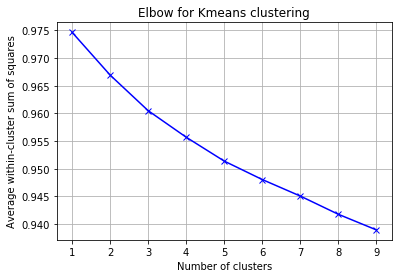

1
*************************
2
*************************
3
*************************
4
*************************
5
*************************
6
*************************
7
*************************


In [5]:
corpus_train = "data/data77520/corpus_train.txt"
cluster_docs = "cluster_result_document.txt"
cluster_keywords = "cluster_result_keyword.txt"
num_clusters = 7
tfidf_train,word_dict=tfidf_vector(corpus_train)
best_kmeans(tfidf_train,word_dict)
cluster_kmeans(tfidf_train,word_dict,cluster_docs,cluster_keywords,num_clusters)